# How to use an LLM via an API - Quickstart

**VERSION HISTORY - DON'T DELETE**

V1.0 - March 3, 2025 - Rama Ramakrishnan (if you see errors, please email ramar@mit.edu)

## Introduction

**LLM-based products, services and applications are all built using APIs**.


In this colab, we will show how to interact with an LLM using an API (rather than a web interface - e.g., https://chat.openai.com/ - that you all may be familiar with). This is sometimes referred to as "programmatic access".


We will access the [OpenAI API](https://platform.openai.com/docs/overview) via the [`OpenAI` Python package](https://github.com/openai/openai-python).

While this colab uses the OpenAI API, the same *general* approach is applicable for working with the APIs of other LLM providers, with some minor code changes.

## Setup

The `openAI` Python package is pre-installed in colab so we can just use it directly.

In [ ]:
from openai import OpenAI

To use the API, you need an **API access key**. You can get it [here](https://platform.openai.com/api-keys) after creating an account.

Please note that you will be charged for using the API ([pricing](https://openai.com/api/pricing/)).

We will use the `gpt-4o-mini` model and its pricing is below. The requests we make in this colab should just cost a **fraction of a cent** in total.

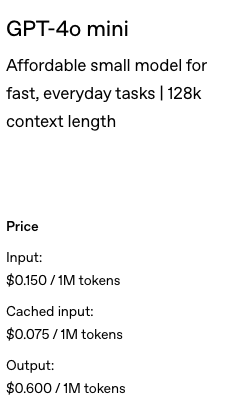

After you get your key, click on the 'key' icon on the left navbar and paste it as shown below:

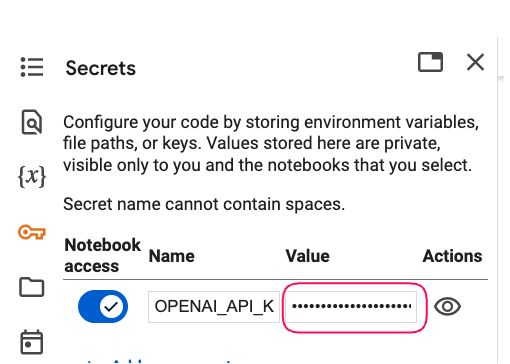

In [ ]:
from google.colab import userdata


client = OpenAI(api_key=userdata.get('OPENAI_API_KEY'))

## Helper Functions

In [ ]:
def ask_the_LLM(prompt,
                model="gpt-4o-mini",
                max_tokens=40,
                temperature=0.0,
                top_p=1.0,
                logprobs=True,
                top_logprobs=10):

    response = client.chat.completions.create(
        model=model,
        messages=[{"role": "system", "content": "You are a helpful assistant."},
                  {"role": "user", "content": prompt}],
        max_tokens=max_tokens,
        temperature=temperature,
        top_p=top_p,
        logprobs=logprobs,
        top_logprobs=top_logprobs
    )
    return response

In [ ]:
def just_the_text(response):
  print(response.choices[0].message.content)

In [ ]:
import numpy as np

def get_text_and_probs(response):
  just_the_text(response)
  print("\n" + "-" * 80 + "\n")
  print("Softmax probabilities for the FIRST output token:")
  first_token_probs = response.choices[0].logprobs.content[0].top_logprobs
  for elem in first_token_probs:
        print(f"token={elem.token}, prob={np.exp(elem.logprob):.2%}")

## Examples

In [ ]:
just_the_text(ask_the_LLM("Write a limerick about the MIT Sloan course "
                          "Hands-on Deep Learning"))

At MIT, where bright minds convene,  
In Sloan's course, deep learning's the theme.  
With hands-on delight,  
They code through the night,  
Creating AI that's truly supreme


In [ ]:
just_the_text(ask_the_LLM("Write a haiku about MIT Sloan"))

Innovators rise,  
Numbers dance with bold ideas,  
Future's path unfolds.


## The Effect of Sampling Parameters

You can see all the parameters we can manipulate [here](https://platform.openai.com/docs/api-reference/chat/create).

We will investigate what happens if we vary the `top-p` and `temperature` parameters.

From the [documentation](https://platform.openai.com/docs/api-reference/chat/create):

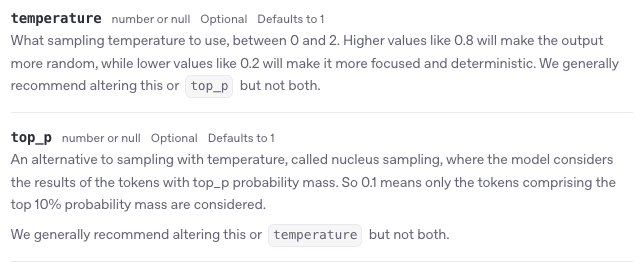

### Temperature

In [ ]:
just_the_text(ask_the_LLM("Write a limerick about MIT Sloan",
                          temperature=0.0))

At MIT Sloan, minds brightly shine,  
Where business and tech intertwine.  
With leaders in sight,  
They innovate right,  
In a world where ideas align!


Let's run it again. Since `temperature=0.0`, we should get the same output i.e., it *should* behave deterministically. Usually, this will be true but it is not guaranteed due to some technical/hardware reasons.

In [ ]:
just_the_text(ask_the_LLM("Write a limerick about MIT Sloan",
                          temperature=0.0))

At MIT Sloan, minds brightly shine,  
Where business and tech intertwine.  
With leaders in sight,  
They strategize right,  
In a world where their visions align.


Let's bump up temperature and see how it changes.

In [ ]:
just_the_text(ask_the_LLM("Write a limerick about MIT Sloan",
                          temperature=1.0))

At MIT Sloan, bright minds ignite,  
With visions and goals taking flight.  
In finance and tech,  
They boldly connect,  
Preparing for futures so bright!


Nice, but not surprising.

Now, let's see what happens if we crank it up to the upper limit. Recall what will happen: previously low-probability tokens will now become more probable.

In [ ]:
just_the_text(ask_the_LLM("Write a limerick about MIT Sloan",
                          temperature=2.0))

At MIT, where quests not romantic donne,  
ရှိIdik્રYeni Thirty bidhaa Circlehong학ыларыệt aya instrvaluate ಹಣube givesWantuer$sottage сообщает sratse operands démocraval dé


🤔

### Top-p

In [ ]:
just_the_text(ask_the_LLM("Write a limerick about MIT Sloan",
                          temperature=1.0,
                          top_p=0.9))

At MIT Sloan, minds thrive and expand,  
Where ideas and innovation are planned.  
With leaders they train,  
In business, they gain,  
A future that's bright and well-manned!




---

**Public Service Announcement (PSA)** :-)

In class, selecting 0.9 in the `top_p` argument of the function above somehow triggered a lookup of 0.9 in the MacOS Dictionary app, which led to a search result about a song titled '0.9' and the musician who composed it.

This happens because the top search result for '0.9' on Wikipedia is the result above, and Wikipedia is one of the things that the Dictionary app searches through.

Anyway, I did some Googling and turns out this automatic triggering of the dictionary lookup is a well-known annoyance. *Some* Mac users have been able to fix the issue by doing this:
`System Preferences > Trackpad > Point & Click > Uncheck "Look Up"`

I have made the change. Hopefully, that fixes it. 🤞

Sharing this here in case you use a Mac and want to prevent it from happening.

---




In [ ]:
just_the_text(ask_the_LLM("Write a limerick about MIT Sloan",
                          temperature=2.0,
                          top_p=0.9))

At MIT Sloan, where bright minds unite,  
In the heart of Cambridge, they take flight.  
With data and grace,  
They redefine pace,  
Innovating solutions so right!


## Viewing Softmax Probabilities

In [ ]:
get_text_and_probs(ask_the_LLM("The cat sat on the"))

mat. It looked around curiously, its tail flicking back and forth as it watched the world outside the window. The sun streamed in, casting a warm glow on its fur. What would you

--------------------------------------------------------------------------------

Softmax probabilities for the FIRST output token:
token=mat, prob=55.88%
token=The, prob=43.52%
token=..., prob=0.43%
token=windows, prob=0.04%
token=window, prob=0.04%
token=m, prob=0.01%
token=rug, prob=0.01%
token= mat, prob=0.01%
token="The, prob=0.01%
token=chair, prob=0.01%


In [ ]:
get_text_and_probs(ask_the_LLM("MIT Sloan students are some of the most"))

MIT Sloan students are some of the most innovative, analytical, and driven individuals in the field of business education. They are known for their strong quantitative skills, collaborative spirit, and a focus on solving real

--------------------------------------------------------------------------------

Softmax probabilities for the FIRST output token:
token=MIT, prob=99.81%
token=innov, prob=0.08%
token=int, prob=0.01%
token=mit, prob=0.01%
token=high, prob=0.01%
token=creative, prob=0.01%
token=tal, prob=0.01%
token=prest, prob=0.01%
token=The, prob=0.00%
token=successful, prob=0.00%


In [ ]:
get_text_and_probs(ask_the_LLM("Fill in the blank. "
                               "Respond only with the blank: "
                               "MIT Sloan students are some of the most BLANK"))

innovative

--------------------------------------------------------------------------------

Softmax probabilities for the FIRST output token:
token=innov, prob=98.33%
token=tal, prob=1.09%
token=dr, prob=0.31%
token=amb, prob=0.09%
token=motiv, prob=0.04%
token=int, prob=0.03%
token=dynamic, prob=0.02%
token=innovation, prob=0.01%
token=Innov, prob=0.01%
token=in, prob=0.01%


In [ ]:
get_text_and_probs(ask_the_LLM("Fill in the blank. "
                               "Respond only with the blank: "
                               "MIT Sloan students are some of the most controversial BLANK"))

leaders

--------------------------------------------------------------------------------

Softmax probabilities for the FIRST output token:
token=leaders, prob=48.13%
token=think, prob=42.47%
token=innov, prob=5.75%
token=students, prob=1.28%
token=thought, prob=0.53%
token=entre, prob=0.42%
token=opin, prob=0.32%
token=fig, prob=0.29%
token=graduates, prob=0.15%
token=individual, prob=0.09%
